In [91]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from Matp

#### `QUESTION 1` 

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Tesla and the ticker symbol is `TSLA`.


In [92]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named shopify_data. Set the period parameter to 'top' so we get information for the top amount of time.

In [238]:
tesla_data = tesla.history(period="1mo")

Reset the index, save, and display the first five rows of the shopify_data dataframe using the head function. Take a screenshot of the results.

In [239]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-17 00:00:00-05:00,214.860001,215.669998,212.009995,215.550003,103164400,0.0,0.0
2024-01-18 00:00:00-05:00,216.880005,217.449997,208.740005,211.880005,108595400,0.0,0.0
2024-01-19 00:00:00-05:00,209.990005,213.190002,207.559998,212.190002,102095800,0.0,0.0
2024-01-22 00:00:00-05:00,212.259995,217.800003,206.270004,208.800003,117952500,0.0,0.0
2024-01-23 00:00:00-05:00,211.300003,215.649994,207.750000,209.139999,106605900,0.0,0.0


#### `QUESTION 2` 

# Tesla Revenue from website of companies MarketCap

Use the `requests` library to download the webpage [https://companiesmarketcap.com/tesla/revenue/. Save the text of the response as a variable named `html`.


In [131]:
url = "https://companiesmarketcap.com/tesla/revenue/" 

In [132]:
r = requests.get(url)

In [133]:
html = r.text

Parse the html data using `beautiful_soup`.


In [142]:
soup = BeautifulSoup(html , parser='lxml')

Looking for the revenue of 2023

In [179]:
tesla_data_rev = dict()
col = soup.find_all('h2')
tesla_revenue = col[0].text
tesla_data_rev['Revenue' ] = tesla_revenue.split()[4]
tesla_data_rev['Unite' ] = tesla_revenue.split()[5]
print(tesla_data_rev)
print(tesla_revenue)

{'Revenue': '$96.77', 'Unite': 'B'}
Revenue in 2023 (TTM): $96.77 B


#### `QUESTION 3`

We will do the same thing as we did for Tesla

In [146]:
gamestop = yf.Ticker("GME")

In [241]:
gamestop_data = tesla.history(period="1mo")

In [150]:
gamestop_data.reset_index(inplace=True)

In [152]:
gamestop_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2024-02-16 00:00:00-05:00,202.059998,203.169998,197.399994,199.949997,111173600,0.0,0.0


#### `QUESTION 4`

In [163]:
url2 = "https://companiesmarketcap.com/gamestop/marketcap/"

In [164]:
r2 = requests.get(url2)

In [165]:
html2 = r2.text

In [240]:
soup2 =BeautifulSoup(html2 , parser='lxml')

In [181]:
gamestop_data_rev = dict()
col2 = soup2.find_all('h2')
gamestop_revenue = col2[0].text
print(gamestop_revenue)
gamestop_data_rev['Revenue' ] = gamestop_revenue.split()[2]
gamestop_data_rev['Unite' ] = gamestop_revenue.split()[3]
print(gamestop_data_rev)

Market cap: $4.31 Billion
{'Revenue': '$4.31', 'Unite': 'Billion'}


#### `QUESTION 5`

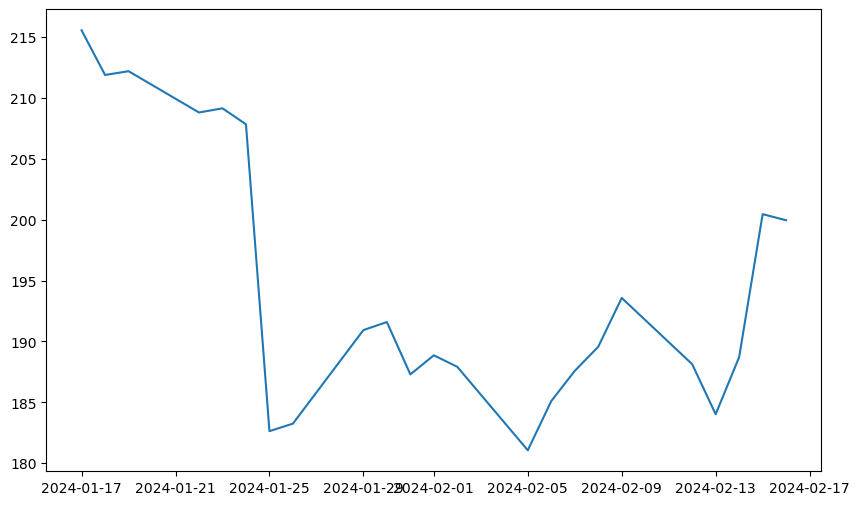

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.plot(tesla_data.index, tesla_data['Close'], label='Close Price')

#### `QUESTION 6`

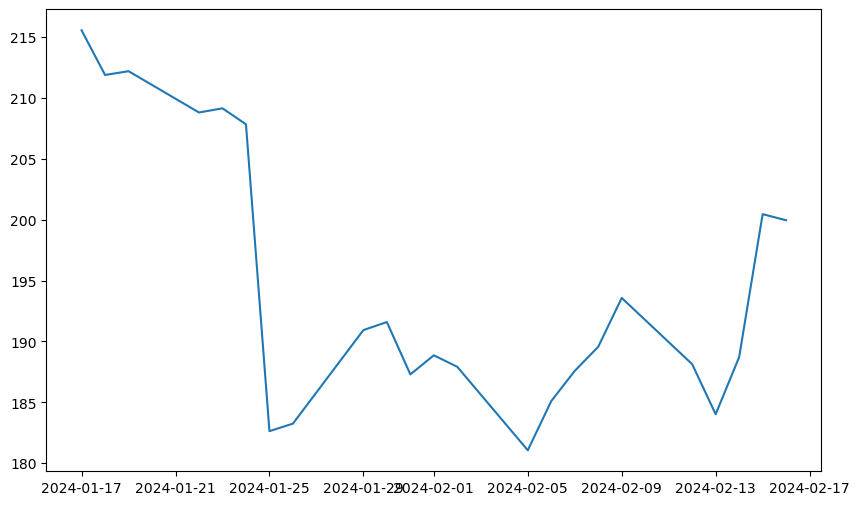

In [253]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the plot
plt.plot(gamestop_data.index, gamestop_data['Close'], label='Close Price')
